## Filtros_Jorge

ECG

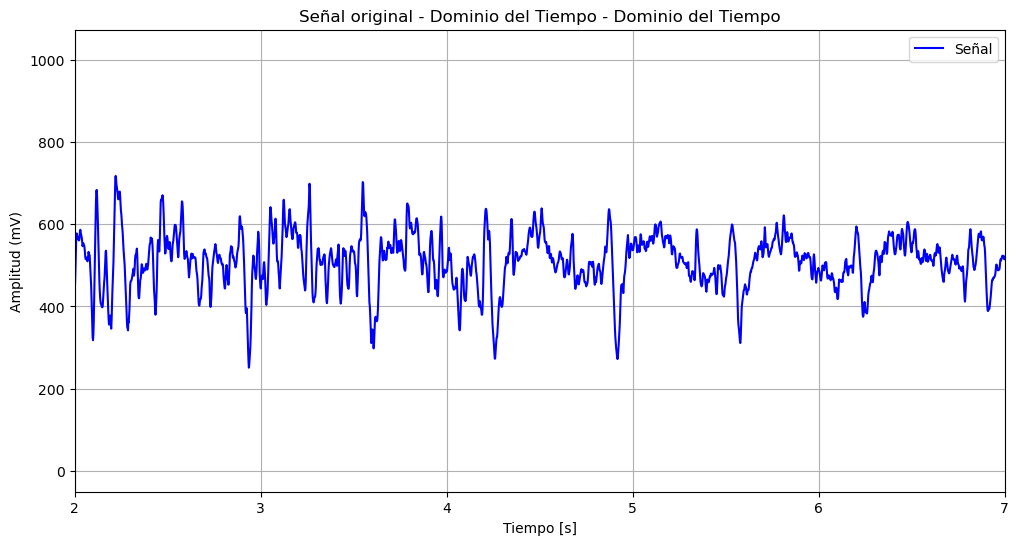

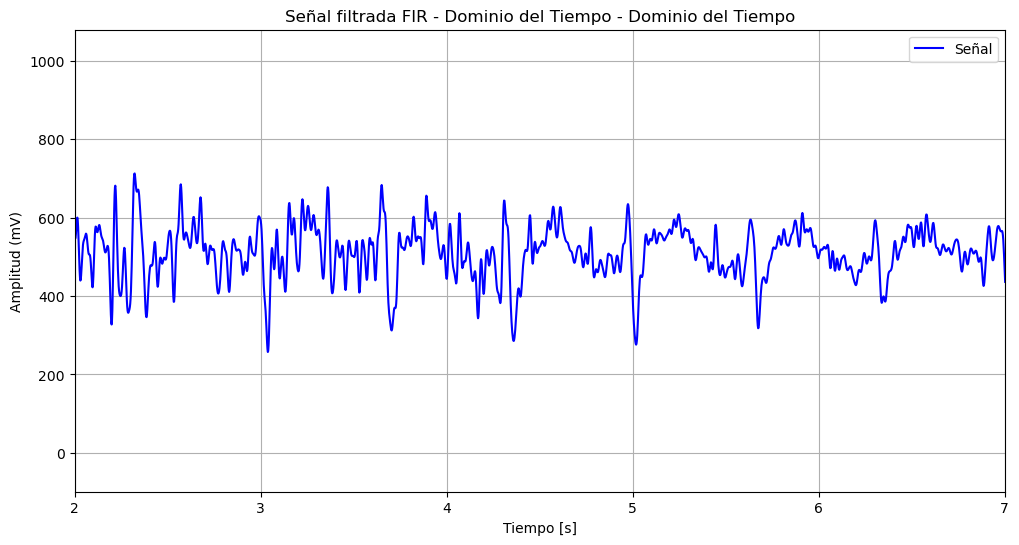

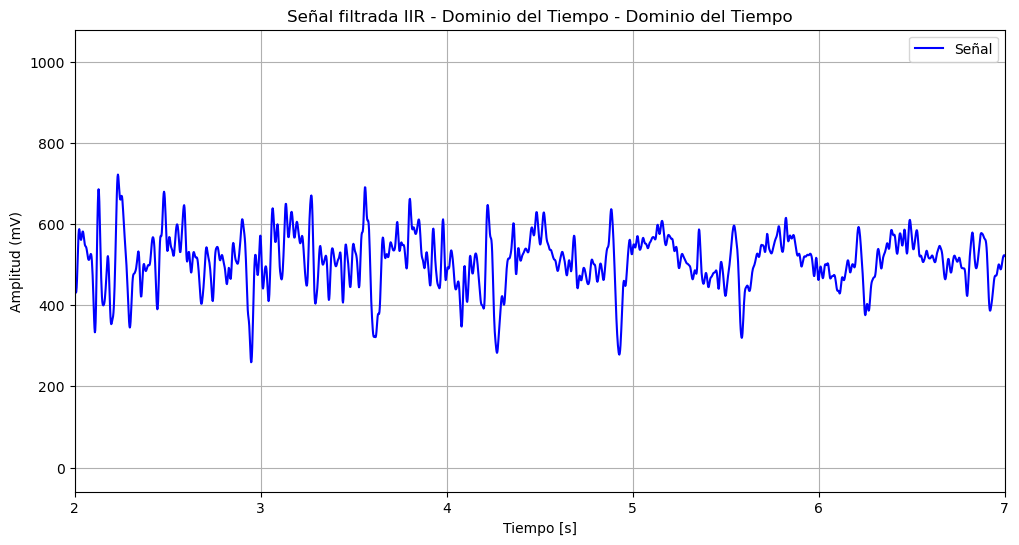

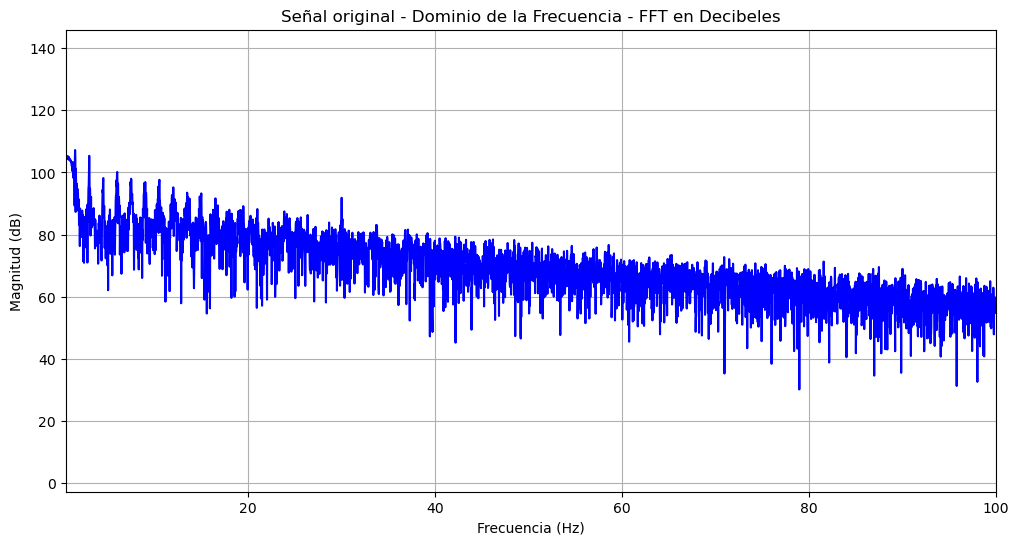

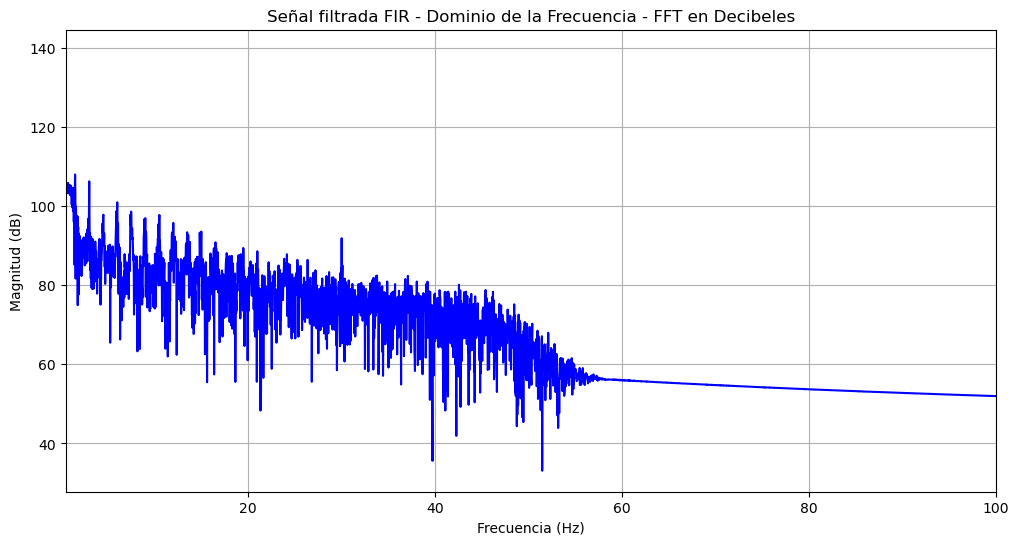

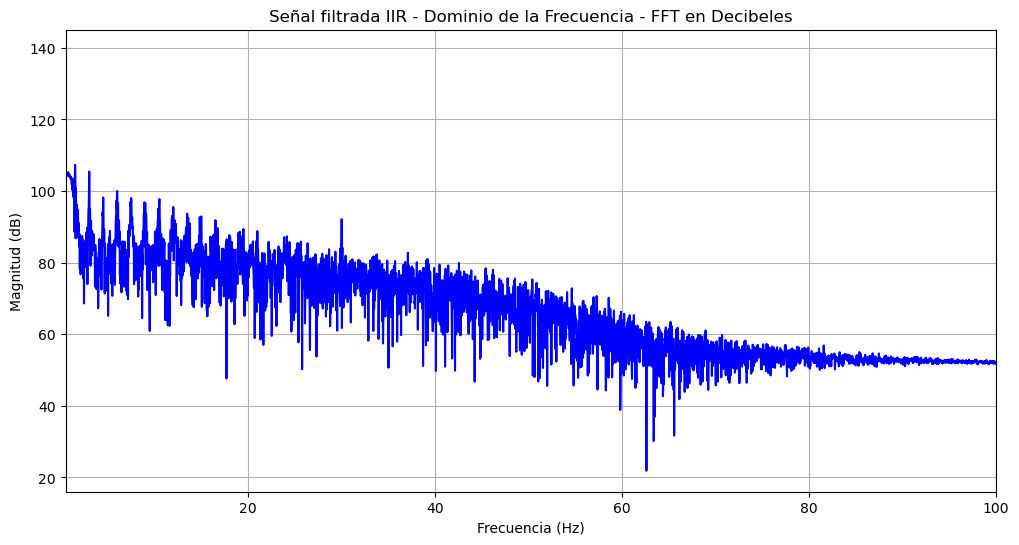

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import firwin, lfilter, butter, freqz

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/EjercicioD1.txt', comments='#', skiprows=4)

# Extraer la data
reposoD1 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(reposoD1)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# --------------------------------------------
# Filtro FIR
cutoff_fir = 50  # Frecuencia de corte en Hz
numtaps = 101  # Número de coeficientes del filtro FIR

# Diseño del filtro FIR
fir_coeff = firwin(numtaps, cutoff_fir, window='hamming', fs=fs)

# Aplicar el filtro FIR a la señal
filtered_fir = lfilter(fir_coeff, 1.0, reposoD1)

# --------------------------------------------
# Filtro IIR
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Frecuencia de Nyquist
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

cutoff_iir = 50  # Frecuencia de corte en Hz
order = 5  # Orden del filtro IIR

# Obtener los coeficientes del filtro IIR Butterworth
b, a = butter_lowpass(cutoff_iir, fs, order=order)

# Aplicar el filtro IIR a la señal
filtered_iir = lfilter(b, a, reposoD1)

# --------------------------------------------
# Función para plotear la señal en el dominio del tiempo
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG
    plt.grid(True)
    plt.show()

# --------------------------------------------
# Ploteo de las señales originales y filtradas
# Señal original en el dominio del tiempo
plot_time_domain(reposoD1, 'Señal original - Dominio del Tiempo', fs)

# Señal filtrada FIR en el dominio del tiempo
plot_time_domain(filtered_fir, 'Señal filtrada FIR - Dominio del Tiempo', fs)

# Señal filtrada IIR en el dominio del tiempo
plot_time_domain(filtered_iir, 'Señal filtrada IIR - Dominio del Tiempo', fs)

# --------------------------------------------
# Dominio de la frecuencia
# Señal original en el dominio de la frecuencia
plot_frequency_domain(reposoD1, 'Señal original - Dominio de la Frecuencia', fs)

# Señal filtrada FIR en el dominio de la frecuencia
plot_frequency_domain(filtered_fir, 'Señal filtrada FIR - Dominio de la Frecuencia', fs)

# Señal filtrada IIR en el dominio de la frecuencia
plot_frequency_domain(filtered_iir, 'Señal filtrada IIR - Dominio de la Frecuencia', fs)


Justificación:
* El filtro FIR fue seleccionado por su estabilidad, ya que no tiene retroalimentación y es ideal para señales que requieren una fase lineal, como es el caso de las señales ECG. Utilizamos una frecuencia de corte de 50 Hz para eliminar componentes de alta frecuencia, como el ruido de red eléctrica (50 Hz en muchos países).

* El filtro IIR Butterworth fue elegido por su eficiencia computacional y su capacidad de proporcionar una transición suave en las frecuencias de corte. Aunque los filtros IIR no garantizan fase lineal, son útiles cuando se requiere una rápida atenuación de frecuencias no deseadas con un menor número de coeficientes.

EMG

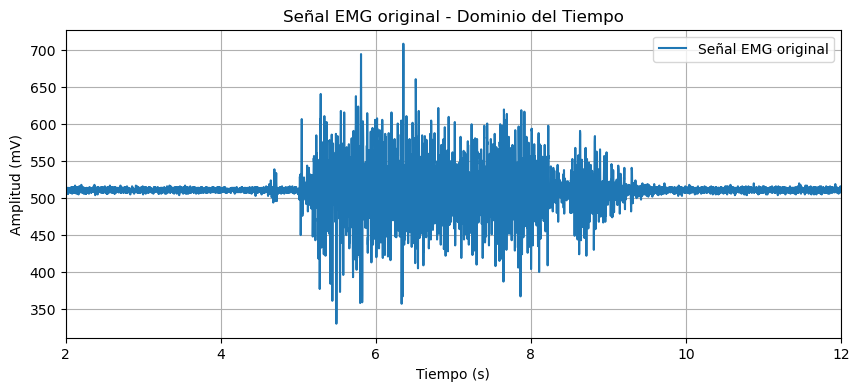

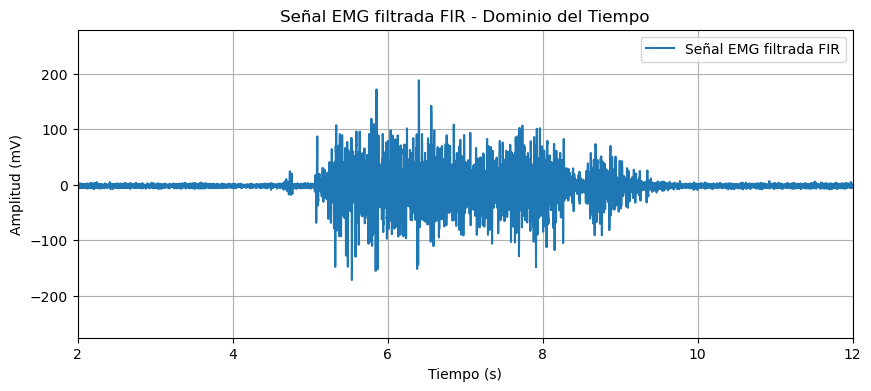

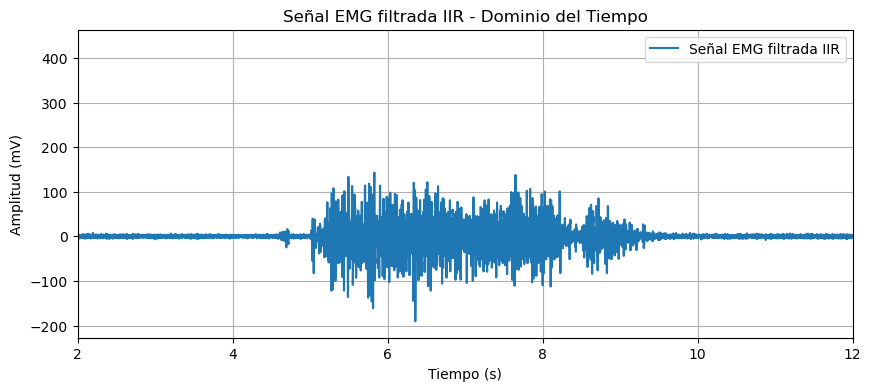

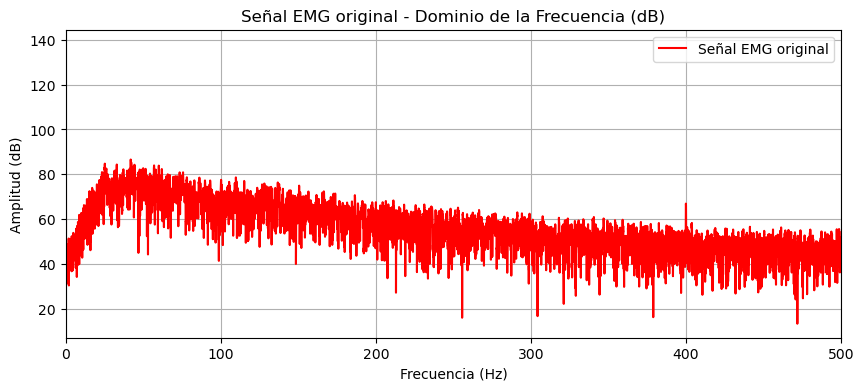

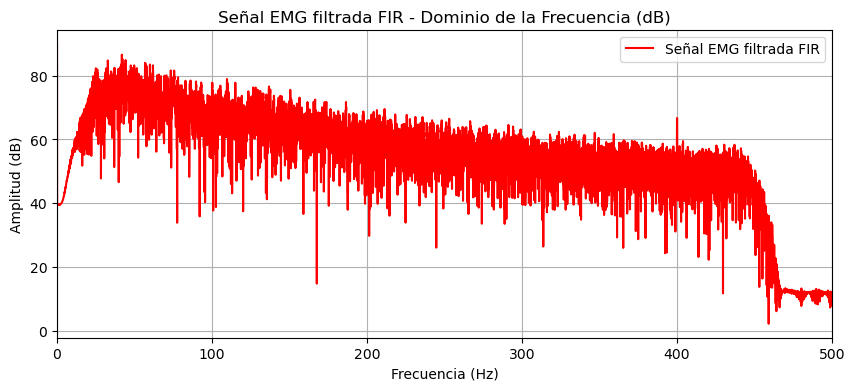

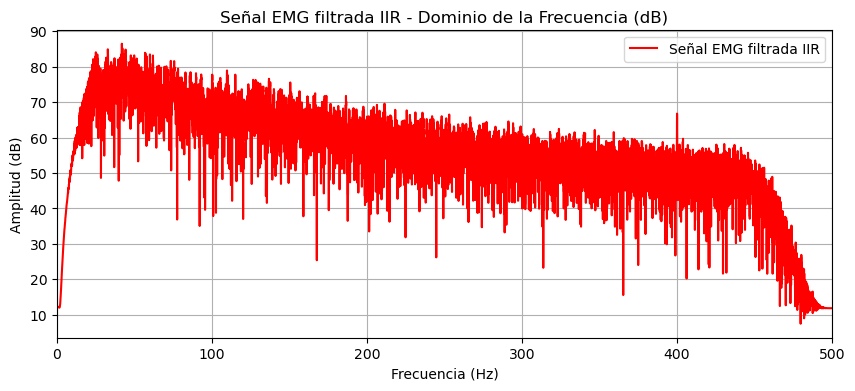

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, butter

# Cargar el archivo de texto
data = np.loadtxt('C:/Users/user/Desktop/Signals/sEMG_signals/Bicep_brachii/biceps_voluntario.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Configurar la tasa de muestreo (1000 Hz)
sampling_rate = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# -------------------------------------------------------
# Filtro FIR de paso banda (20-450 Hz)
lowcut = 20
highcut = 450  # Ajustado a un valor menor a 500 para evitar problemas
numtaps = 101  # Número de coeficientes para el filtro FIR

# Diseño del filtro FIR
fir_coeff = firwin(numtaps, [lowcut, highcut], pass_zero=False, fs=sampling_rate)

# Aplicar el filtro FIR a la señal EMG
filtered_fir = lfilter(fir_coeff, 1.0, emg_signal)

# -------------------------------------------------------
# Filtro IIR de paso banda (20-450 Hz)
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs  # Frecuencia de Nyquist
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Obtener los coeficientes del filtro IIR
b, a = butter_bandpass(lowcut, highcut, sampling_rate, order=4)

# Aplicar el filtro IIR a la señal EMG
filtered_iir = lfilter(b, a, emg_signal)

# -------------------------------------------------------
# Función para plotear la señal en el dominio del tiempo
def plot_time_domain(signal, title):
    plt.figure(figsize=(10, 4))
    plt.plot(time, signal, label=title)
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (mV)')
    plt.xlim([2, 12])  # Ajustar los límites de tiempo
    plt.grid(True)
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibelios
def plot_frequency_domain(signal, title):
    emg_fft = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(n_samples, 1/sampling_rate)
    
    # Calcular la magnitud de la FFT en decibelios
    fft_magnitude = np.abs(emg_fft[:n_samples // 2])
    fft_magnitude_db = 20 * np.log10(fft_magnitude)
    positive_freqs = frequencies[:n_samples // 2]
    
    plt.figure(figsize=(10, 4))
    plt.plot(positive_freqs, fft_magnitude_db, label=title, color='r')
    plt.title(f'{title} - Dominio de la Frecuencia (dB)')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud (dB)')
    plt.xlim(0, 500)  # Limitar el rango de frecuencia relevante
    plt.grid(True)
    plt.legend()
    plt.show()

# -------------------------------------------------------
# Ploteo de las señales originales y filtradas
# Señal original en el dominio del tiempo
plot_time_domain(emg_signal, 'Señal EMG original')

# Señal filtrada FIR en el dominio del tiempo
plot_time_domain(filtered_fir, 'Señal EMG filtrada FIR')

# Señal filtrada IIR en el dominio del tiempo
plot_time_domain(filtered_iir, 'Señal EMG filtrada IIR')

# -------------------------------------------------------
# Dominio de la frecuencia
# Señal original en el dominio de la frecuencia
plot_frequency_domain(emg_signal, 'Señal EMG original')

# Señal filtrada FIR en el dominio de la frecuencia
plot_frequency_domain(filtered_fir, 'Señal EMG filtrada FIR')

# Señal filtrada IIR en el dominio de la frecuencia
plot_frequency_domain(filtered_iir, 'Señal EMG filtrada IIR')


Justificación:
* El filtro FIR de paso banda se utiliza debido a su estabilidad y la capacidad de manejar señales con fases lineales, lo cual es crucial cuando se requiere precisión en la detección de las características de la señal EMG. Se seleccionó el rango de 20 a 500 Hz para filtrar el ruido no deseado y conservar las componentes útiles.

* El filtro IIR Butterworth fue seleccionado por su eficiencia computacional y su capacidad para eliminar ruido de manera efectiva en el mismo rango de frecuencias. Aunque los filtros IIR pueden introducir alguna distorsión de fase, son útiles en situaciones donde se necesita un procesamiento más rápido.

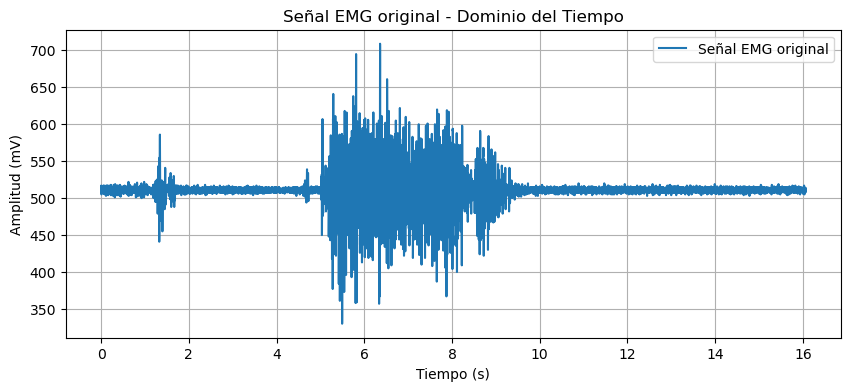

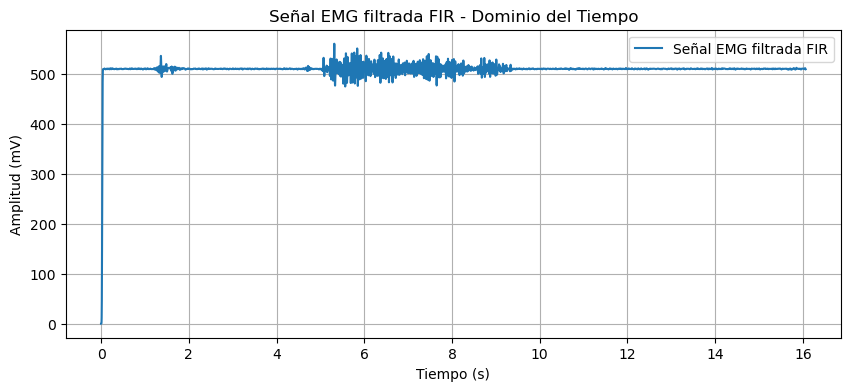

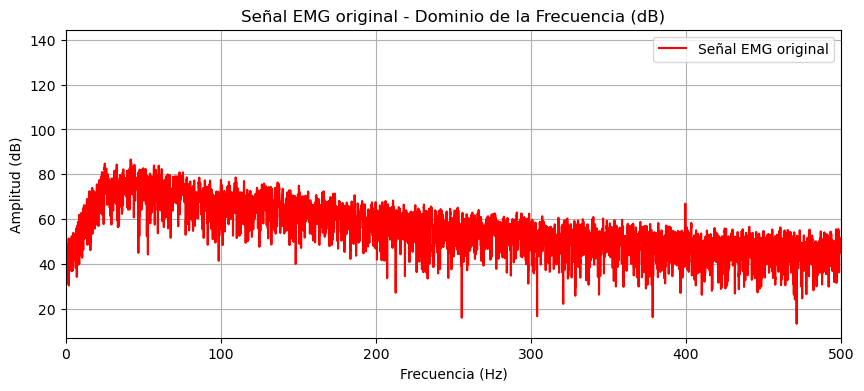

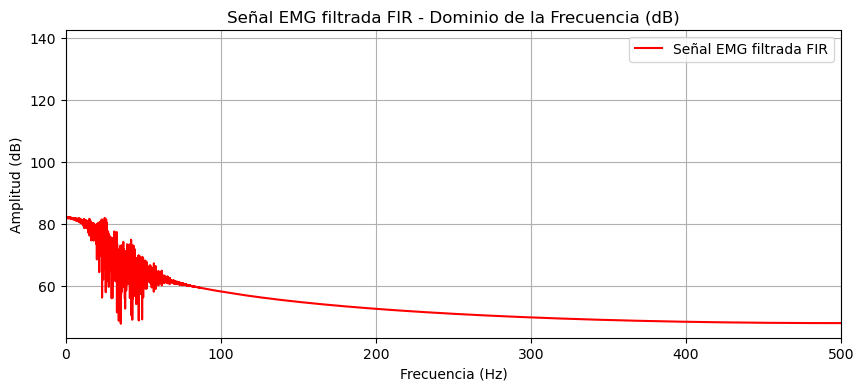

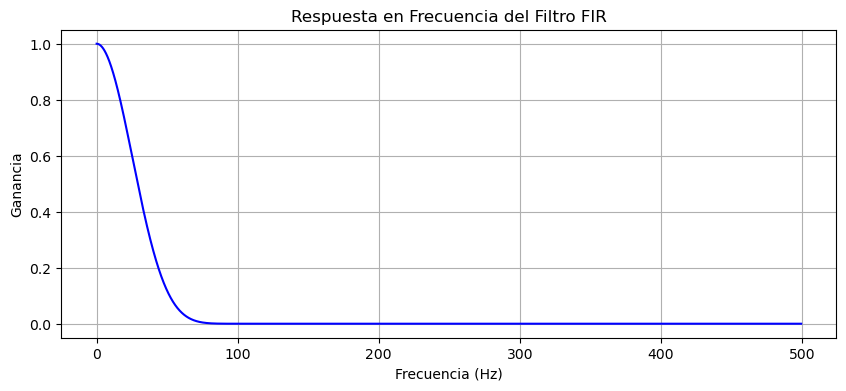

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz

# Cargar el archivo de texto
data = np.loadtxt('C:/Users/user/Desktop/Signals/sEMG_signals/Bicep_brachii/biceps_voluntario.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Coeficientes FIR proporcionados por PyFDA
fir_coeff = [
    1.394972300500339e-06, 6.683517902115232e-06, 2.17326161954006e-05, 5.730819524292741e-05,
    0.0001314987486907445, 0.0002722404775844424, 0.0005196510763537817, 0.0009276248283096371,
    0.0015640549108399285, 0.0025090671178125156, 0.0038507765560708397, 0.005678359418131305,
    0.008072619888391858, 0.011094697586557654, 0.01477403032597017, 0.01909706084669263,
    0.023998392300185446, 0.029356053356723033, 0.034992229466771864, 0.04068024182466241,
    0.046157776111967724, 0.051145499730798905, 0.05536937023299771, 0.058584289926935394,
    0.06059640765268926, 0.061281391525867, 0.06059640765268926, 0.058584289926935394,
    0.05536937023299771, 0.051145499730798905, 0.046157776111967724, 0.04068024182466241,
    0.034992229466771864, 0.029356053356723033, 0.023998392300185446, 0.01909706084669263,
    0.01477403032597017, 0.011094697586557654, 0.008072619888391858, 0.005678359418131305,
    0.0038507765560708397, 0.0025090671178125156, 0.0015640549108399285, 0.0009276248283096371,
    0.0005196510763537817, 0.0002722404775844424, 0.0001314987486907445, 5.730819524292741e-05,
    2.17326161954006e-05, 6.683517902115232e-06, 1.394972300500339e-06
]

# Aplicar el filtro FIR a la señal EMG
filtered_fir = lfilter(fir_coeff, 1.0, emg_signal)

# Parámetros de la señal
sampling_rate = 999  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# Función para plotear la señal en el dominio del tiempo
def plot_time_domain(signal, title):
    plt.figure(figsize=(10, 4))
    plt.plot(time, signal, label=title)
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (mV)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibelios
def plot_frequency_domain(signal, title):
    emg_fft = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(n_samples, 1/sampling_rate)
    
    # Calcular la magnitud de la FFT en decibelios
    fft_magnitude = np.abs(emg_fft[:n_samples // 2])
    fft_magnitude_db = 20 * np.log10(fft_magnitude)
    positive_freqs = frequencies[:n_samples // 2]
    
    plt.figure(figsize=(10, 4))
    plt.plot(positive_freqs, fft_magnitude_db, label=title, color='r')
    plt.title(f'{title} - Dominio de la Frecuencia (dB)')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud (dB)')
    plt.xlim(0, 500)  # Limitar el rango de frecuencia relevante
    plt.grid(True)
    plt.legend()
    plt.show()

# Ploteo de las señales originales y filtradas
# Señal original en el dominio del tiempo
plot_time_domain(emg_signal, 'Señal EMG original')

# Señal filtrada FIR en el dominio del tiempo
plot_time_domain(filtered_fir, 'Señal EMG filtrada FIR')

# Dominio de la frecuencia
# Señal original en el dominio de la frecuencia
plot_frequency_domain(emg_signal, 'Señal EMG original')

# Señal filtrada FIR en el dominio de la frecuencia
plot_frequency_domain(filtered_fir, 'Señal EMG filtrada FIR')

# Respuesta en frecuencia del filtro FIR
w, h = freqz(fir_coeff, worN=8000)
plt.figure(figsize=(10, 4))
plt.plot(0.5 * sampling_rate * w / np.pi, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.grid(True)
plt.show()
